   ### LSTM :This program uses artificial recurrent neural network called LOng Short Term Memory (LSTM)
   #### To predict the closing stock price of a corporation using the previous days stock price

###  

### Task 1 : Imports

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)


In [ ]:
df = web.DataReader("AAPL",data_source = "yahoo",start = "2011-01-01" , end = "2020-05-07")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,303.098083,298.538544,298.538544,302.477478,4725600.0,302.477478
2011-01-04,303.393402,300.360352,303.113098,301.361359,3645300.0,301.361359
2011-01-05,305.470459,300.325317,300.335327,304.839844,5059500.0,304.839844
2011-01-06,309.524536,305.330322,305.645660,307.057068,4111400.0,307.057068
2011-01-07,309.434448,305.370361,308.263275,308.528534,4198100.0,308.528534
...,...,...,...,...,...,...
2020-05-01,1351.430054,1309.660034,1324.089966,1317.319946,2443600.0,1317.319946
2020-05-04,1324.469971,1296.010010,1308.130005,1322.900024,1540300.0,1322.900024
2020-05-05,1371.010010,1335.030029,1337.500000,1349.020020,1983300.0,1349.020020


In [ ]:
df.shape


(2352, 6)

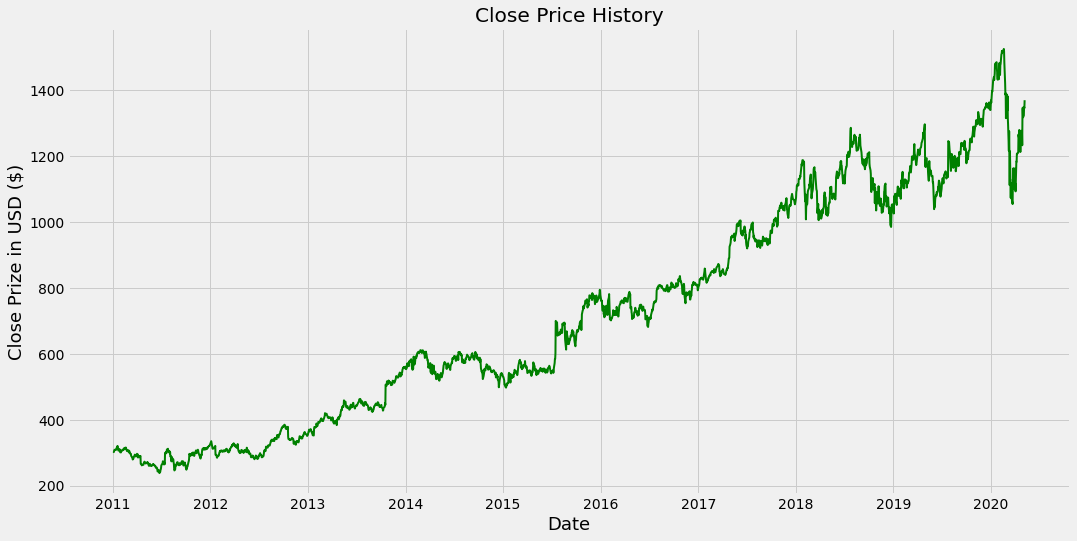

In [ ]:
plt.figure(figsize = (16,8))
plt.title("Close Price History",fontdict={'fontname' : "Comic Sans MS" }) #I hate the normal font 
plt.plot(df["Close"],linewidth=2,color='g')
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Close Prize in USD ($)",fontsize = 18)

plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values  #this convert CLose to an array of values
dataset

array([[ 302.47747803],
       [ 301.36135864],
       [ 304.83984375],
       ...,
       [1349.02001953],
       [1345.43005371],
       [1369.2800293 ]])

In [ ]:
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1882

In [ ]:
scalar = MinMaxScaler(feature_range=(0,1)) #Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set,
scaled_data =scalar.fit_transform(dataset)
scaled_data

array([[0.05034198],
       [0.04947488],
       [0.05217726],
       ...,
       [0.86338485],
       [0.86059586],
       [0.87912454]])

In [ ]:
train_data = scaled_data[0:training_data_len, :]

In [ ]:
x_train =[]  #this will be independent variables
y_train = [] #this is for independent variables
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train) #while 61 there will be 2 passthroughs and 2nd passthroughs first number is the 1st passthroughs 2nd number
        print(y_train)

[array([0.05034198, 0.04947488, 0.05217726, 0.05389979, 0.05504295,
       0.05417585, 0.05487576, 0.05521014, 0.05514015, 0.0580525 ,
       0.06405994, 0.06099595, 0.05905957, 0.05325043, 0.05295882,
       0.05639218, 0.05506628, 0.05517904, 0.04903551, 0.04879053,
       0.05294326, 0.05331653, 0.05259719, 0.05291993, 0.05420696,
       0.05579729, 0.05506628, 0.05504295, 0.05817692, 0.05959617,
       0.05804083, 0.05806805, 0.05847243, 0.06034659, 0.05262052,
       0.05305213, 0.05208006, 0.05255442, 0.05386091, 0.04894608,
       0.04895775, 0.05236778, 0.04889162, 0.04540771, 0.04566044,
       0.04545048, 0.04099058, 0.03959468, 0.03698173, 0.03681454,
       0.0319697 , 0.03362613, 0.03350948, 0.03951303, 0.03983186,
       0.04171381, 0.04355298, 0.04077284, 0.03906975, 0.04154662])]
[0.04158938638201379]
[array([0.05034198, 0.04947488, 0.05217726, 0.05389979, 0.05504295,
       0.05417585, 0.05487576, 0.05521014, 0.05514015, 0.0580525 ,
       0.06405994, 0.06099595, 0.059

In [ ]:
x_train,y_train =np.array(x_train),np.array(y_train)
x_train.shape #gives the number of rows and columns

(1822, 60)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1) ) #here 1 represents no of features i.e, closing price
x_train.shape

(1822, 60, 1)

In [ ]:
model =Sequential()
model.add(LSTM(50,return_sequences = True ,input_shape=(x_train.shape[1],1)))# giving 50 neurons true since we are using other LSTM layer ,since very first layer we should give input shape which 
#is no of time steps no of features which is 1
# 2nd layer
model.add(LSTM(50,return_sequences = False )) #since we are not using anyh more LSTM layers for the model
model.add(Dense(25)) #regular densely connected layer with 25 neurons
model.add(Dense(1))

In [ ]:
model.compile(optimizer ="adam" ,loss ="mean_squared_error") #optimizers are used to improve on loss function


In [ ]:
..model.fit(x_train,y_train,batch_size =1 ,epochs =1) #batchsize is the total no of training examples ,epochs no of iterations data is move forward and backward


Epoch 1/1
1822/1822 [==============================] - 58s 32ms/step - loss: 0.0013


In [ ]:
test_data = scaled_data[training_data_len-60:, :]
x_test = []

y_test = dataset[training_data_len: , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test) #LSTM model always expects a three dimenstion feature
x_test =np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)


In [ ]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

58.12313037628823

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


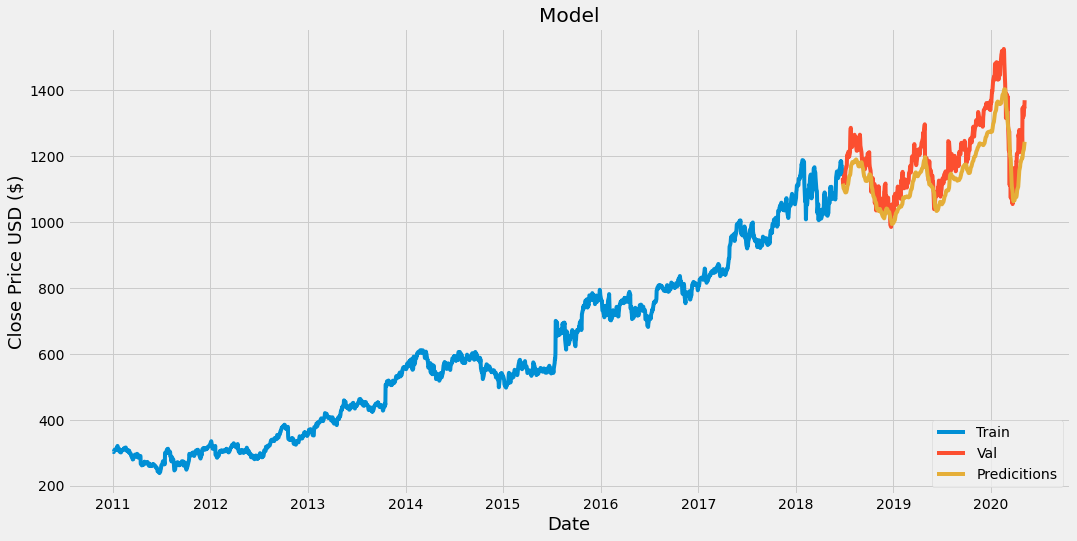

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Close Price USD ($)",fontsize = 18)
plt.plot(train["Close"],linewidth=1)
plt.plot(valid[["Close","Predictions"]])   #i did understand why two columns required
plt.legend(["Train","Val","Predicitions"],loc = "lower right")
plt.show()

In [ ]:
Google_Quote = web.DataReader("GOOGL",data_source = "yahoo",start = "2011-01-01" , end = "2020-05-07")
#new DataFrame:
new_df = Google_Quote.filter(["Close"])
last_60_days = new_df[-60:].values
#scale the data or normalize between 0-1:
last_60_days_scaled = scalar.transform(last_60_days)
#create an empty list
x_test = [] 
#Append the last60 days
x_test.append(last_60_days_scaled)
#convert x_test data set into numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the predicted scale price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scalar.inverse_transform(pred_price)
print(pred_price)

[[1251.3965]]


In [ ]:
Google_Quote = web.DataReader("GOOGL",data_source = "yahoo",start = "2020-05-08" , end = "2020-05-08")
Google_Quote

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-08,1396.640015,1372.682495,1381.819946,1384.339966,1666487,1384.339966
2020-05-08,1396.640015,1372.010010,1381.819946,1384.339966,1666300,1384.339966


### Task 3 : Visualize the Closing Price

### Task 4:  New Data Frame with only Close Column